In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
def load_data(file_path):
    """
    Load data from a CSV file.
    
    Args:
        file_path (str): Path to the CSV file.
    
    Returns:
        pd.DataFrame: DataFrame containing the loaded data.
    """
    try:
        data = pd.read_csv(file_path, header=None)
        # Assign column names ["sepal length","sepal width","petal length","petal width","family"]
        data.columns = ["sepal length", "sepal width", "petal length", "petal width", "family"]
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

In [30]:
df = load_data("iris.csv")
# map the family names to numbers in the df 
family_mapping = { "Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2 }
df['family'] = df['family'].map(family_mapping)
print(df)

     sepal length  sepal width  petal length  petal width  family
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       1
146           6.3          2.5           5.0          1.9       1
147           6.5          3.0           5.2          2.0       1
148           6.2          3.4           5.4          2.3       1
149           5.9          3.0           5.1          1.8       1

[150 rows x 5 columns]


In [31]:
#sns.set_theme()
# create a sns histplot with sepal length as x and frequency as y for the three families overlapping and transparent

#sns.histplot(data=df, x="sepal length",hue="family", bins=10, alpha = 0.5)


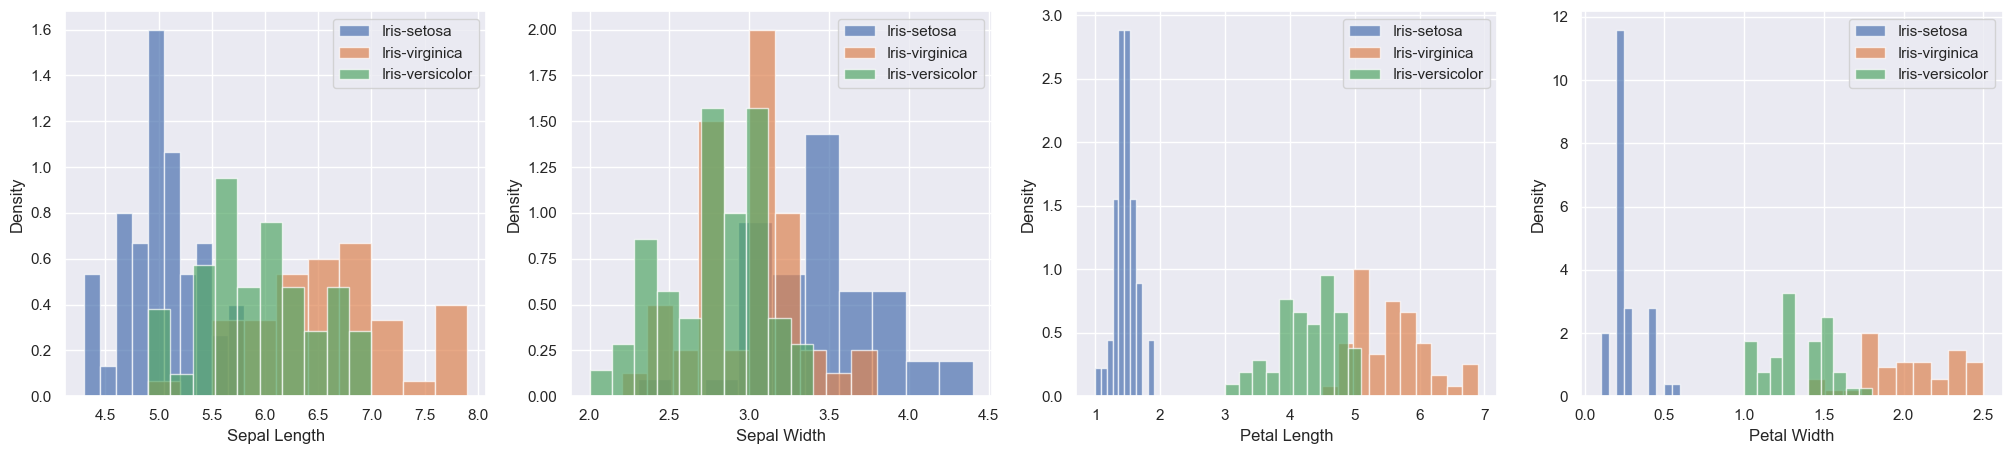

In [76]:
# plot histogram of the sepal length
# change the color of the element depending on the family

columns = 4

grandLabels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

fig, axs = plt.subplots(1, columns, figsize=(25, 5))

for j,grandlabel in enumerate(grandLabels):
    #axs[j].figure()
    axs[j].set_xlabel(grandlabel)
    axs[j].set_ylabel('Density') 
    #axs[j].title(grandlabel + " Distribution")
    #axs[j].xlabel(grandlabel)
    #axs[j].ylabel("Density")
    for k,v in family_mapping.items():
        axs[j].hist(df[grandlabel.lower()][df['family'] == v], bins=10, alpha=0.7, density=True,label = k)
    axs[j].legend()
    #axs[j].tight_layout()
plt.show()

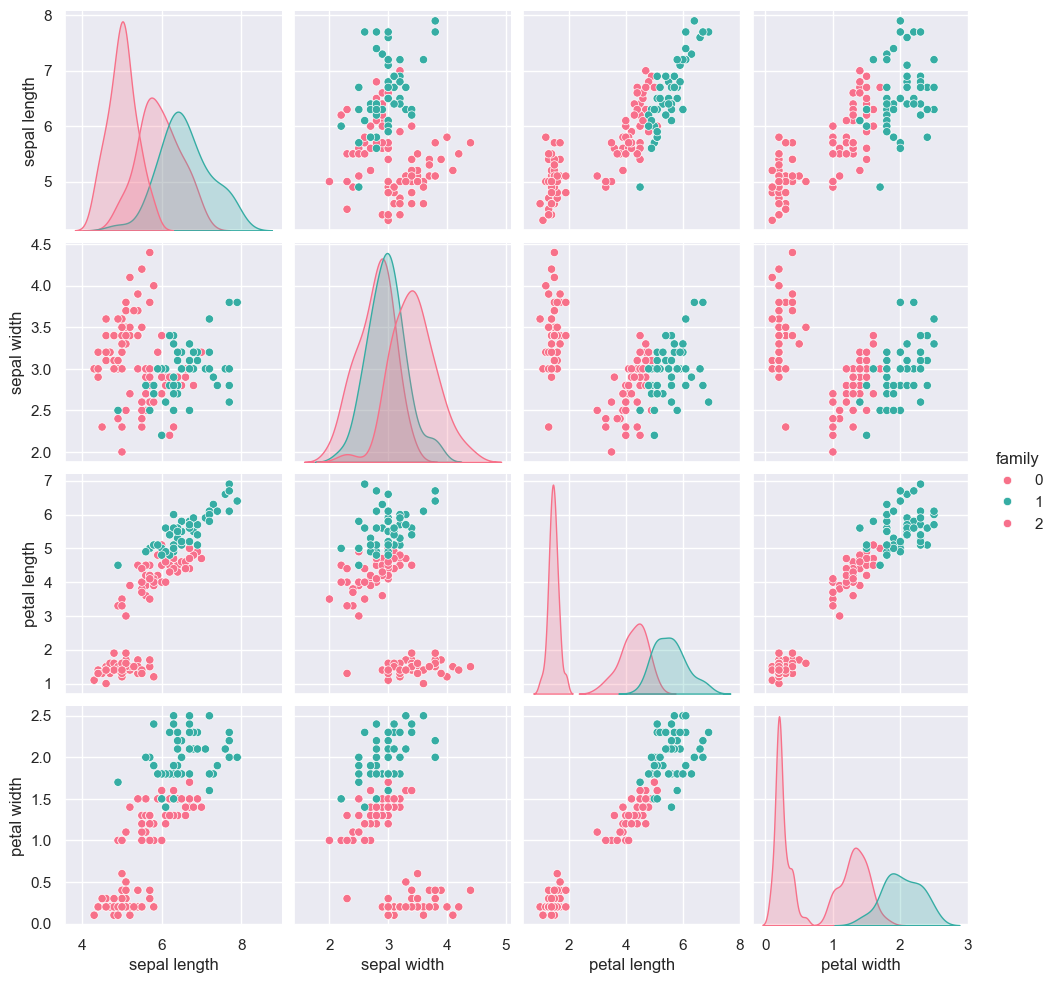

In [ ]:
# plots with each combination of the four features
# create a pairplot with the four features and the family as hue, frequency normalized
sns.pairplot(df, hue="family", diag_kind="auto", palette="husl")
plt.show()